In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
read = '/content/drive/MyDrive/global_health.csv'
data = pd.read_csv(read)


In [ ]:
missing_value = data.isnull().sum() # her sutundaki eksik veri saysısı
missing_percent = (missing_value / len(data)) * 100

In [ ]:
print(f'her sutundaki veri sayısı {missing_value}')
print(f'Eksik verilerin yüzdesi {missing_percent}')


her sutundaki veri sayısı Country                             0
Country_Code                        0
Year                                0
Fertility_Rate                     36
Urban_Population_Percent            0
Total_Population                    0
Water_Access_Percent              655
Unemployment_Rate                 140
Sanitary_Expense_Per_GDP           46
Life_Expectancy                    40
Life_Expectancy_Female             40
Life_Expectancy_Male               40
Infant_Deaths                      10
GDP_Per_Capita                     27
Hospital_Beds_Per_1000            599
Female_Population                   0
Male_Population                     0
Alcohol_Consumption_Per_Capita    256
Immunization_Rate                  10
Sanitary_Expense_Per_Capita        47
CO2_Exposure_Percent              197
Air_Pollution                     197
Labour_Force_Total                140
Tuberculosis_Per_100000           210
Suicide_Rate_Percent              608
Obesity_Rate_Percent    

In [ ]:
for column in data.columns:
  if data[column].dtype == 'object': #Katogerik veri
    most_frequent = data[column].mode()[0] # En sık görünen değerler
    data[column].fillna(most_frequent)
  else: # Sayısal Değerler
    mean_value = data[column].mean() # Ortalama Değer
    data[column].fillna(mean_value)

# Sonuçları Kontrol Edelim
print('Eksik Verilerin oranı sonrası')
print(data.isnull().sum())




Eksik Verilerin oranı sonrası
Country                             0
Country_Code                        0
Year                                0
Fertility_Rate                     36
Urban_Population_Percent            0
Total_Population                    0
Water_Access_Percent              655
Unemployment_Rate                 140
Sanitary_Expense_Per_GDP           46
Life_Expectancy                    40
Life_Expectancy_Female             40
Life_Expectancy_Male               40
Infant_Deaths                      10
GDP_Per_Capita                     27
Hospital_Beds_Per_1000            599
Female_Population                   0
Male_Population                     0
Alcohol_Consumption_Per_Capita    256
Immunization_Rate                  10
Sanitary_Expense_Per_Capita        47
CO2_Exposure_Percent              197
Air_Pollution                     197
Labour_Force_Total                140
Tuberculosis_Per_100000           210
Suicide_Rate_Percent              608
Obesity_Rate_Percent

In [ ]:
# Katogorik Sutunlardaki Benzersiz değer sayısı
catogorical_columns = data.select_dtypes(include=['object']).columns
print('\n Katogorik sutunlardaki benzersiz değerler ')
for column in catogorical_columns:
  print(f'{column}: {data[column].nunique()} benzersiz değer ')



 Katogorik sutunlardaki benzersiz değerler 
Country: 188 benzersiz değer 
Country_Code: 188 benzersiz değer 


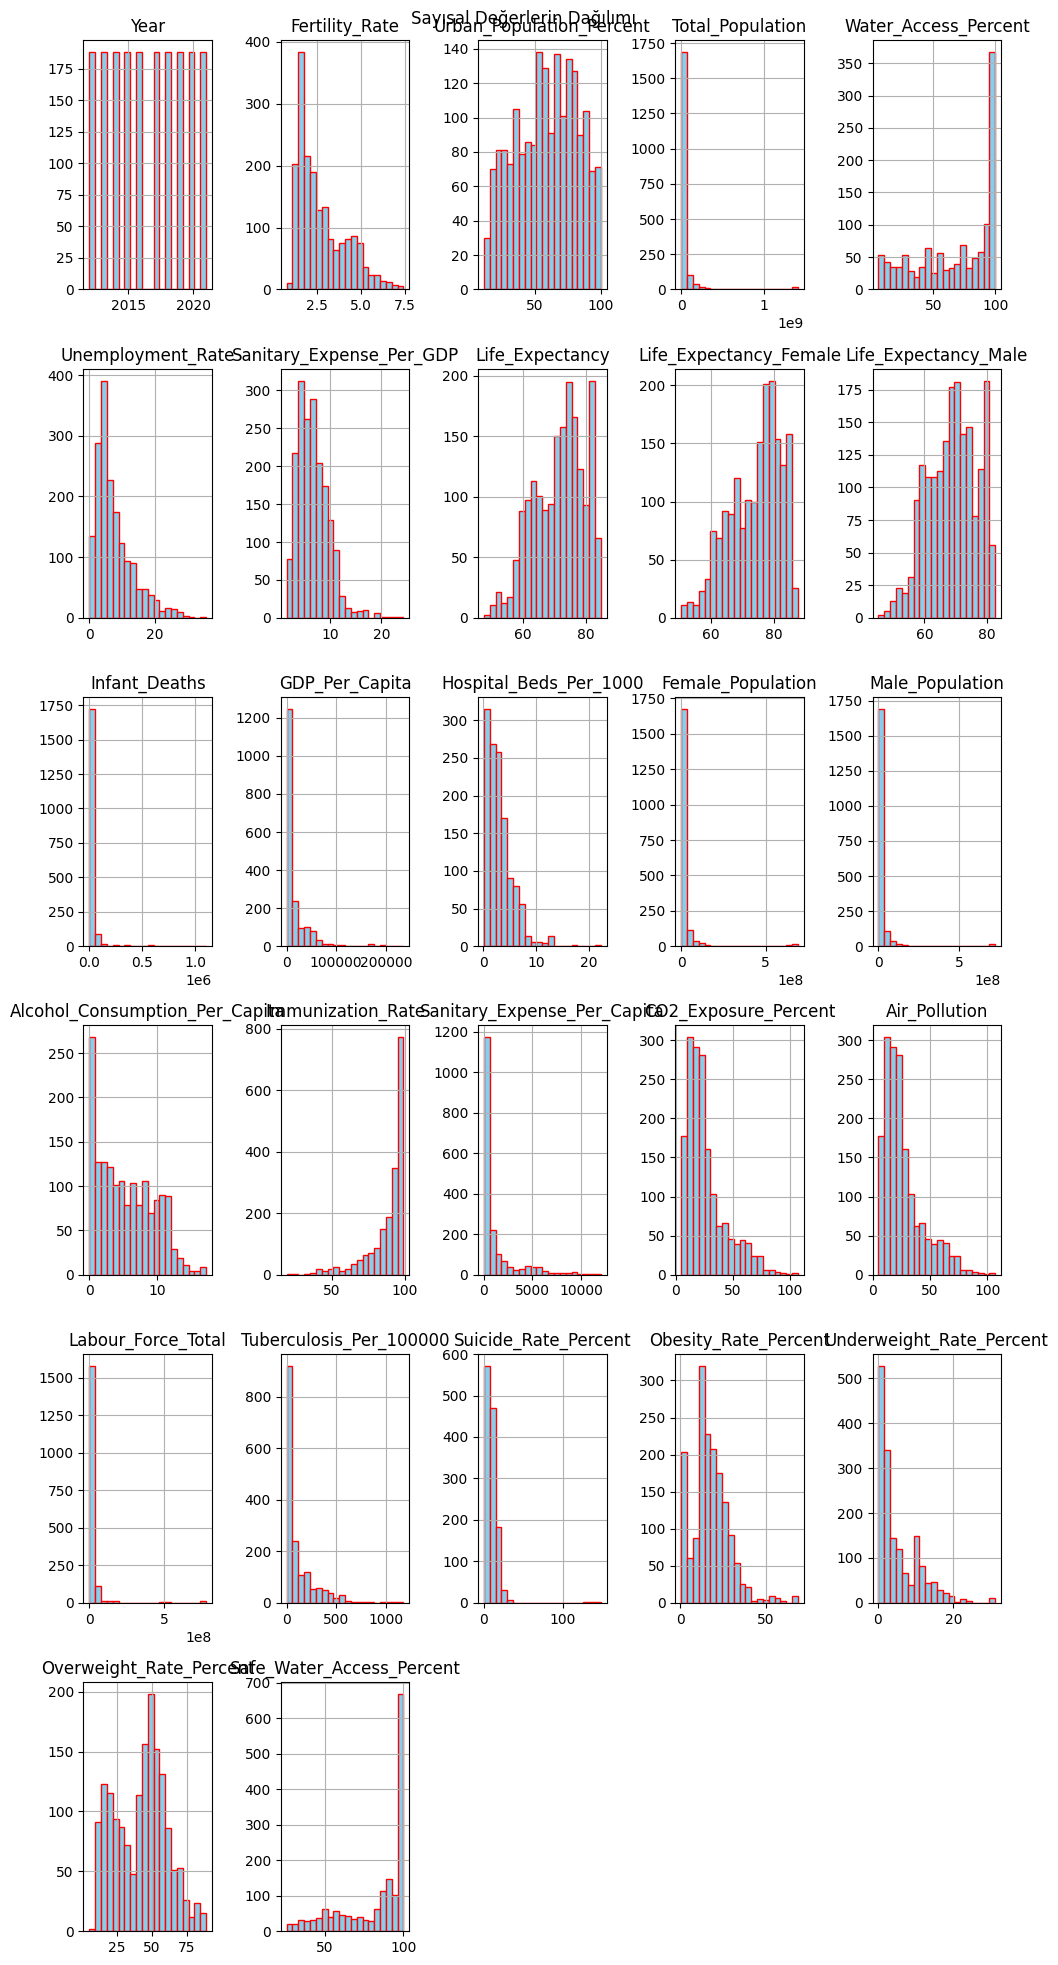

In [ ]:
#Sayısal sütünların dağılımını incelemek için histogram
data.select_dtypes(include=['float64', 'int64']).hist(figsize=(10,20), bins=20, color = 'skyblue', edgecolor = 'red')
plt.suptitle('Sayısal Değerlerin Dağılımı')
plt.tight_layout()
plt.show()


In [ ]:
# Eksik veri oranı yüksek sutunları belirleme

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_data = data.select_dtypes(include = 'number')

scaler_data = scaler.fit_transform(numeric_data)




In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Sadece sayısal sütunları seçelim
numeric_data = data.select_dtypes(include='number')
# Eksik değerleri medyan ile dolduralım
imputer = SimpleImputer(strategy='median')
numeric_data_imputed = imputer.fit_transform(numeric_data)

# Veriyi ölçeklendirelim
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data_imputed)

# K-Means ile kümeleme
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Orijinal veriye küme etiketlerini ekleyelim
data['Cluster'] = clusters



In [ ]:
# Sadece sayısal sütunları seç
numeric_columns = data.select_dtypes(include='number')

cluster_summary = numeric_columns.groupby('Cluster').mean()
print(cluster_summary)


                Year  Fertility_Rate  Urban_Population_Percent  \
Cluster                                                          
0        2016.322188        4.135462                 40.249714   
1        2016.597338        2.003000                 68.891598   
2        2016.500000        1.916900                 45.351700   

         Total_Population  Water_Access_Percent  Unemployment_Rate  \
Cluster                                                              
0            3.353665e+07             28.727345           7.685159   
1            2.083385e+07             83.059470           7.712249   
2            1.366588e+09                   NaN           6.098200   

         Sanitary_Expense_Per_GDP  Life_Expectancy  Life_Expectancy_Female  \
Cluster                                                                      
0                        5.232613        63.196059               65.378220   
1                        7.465263        76.067318               79.007526   
2     

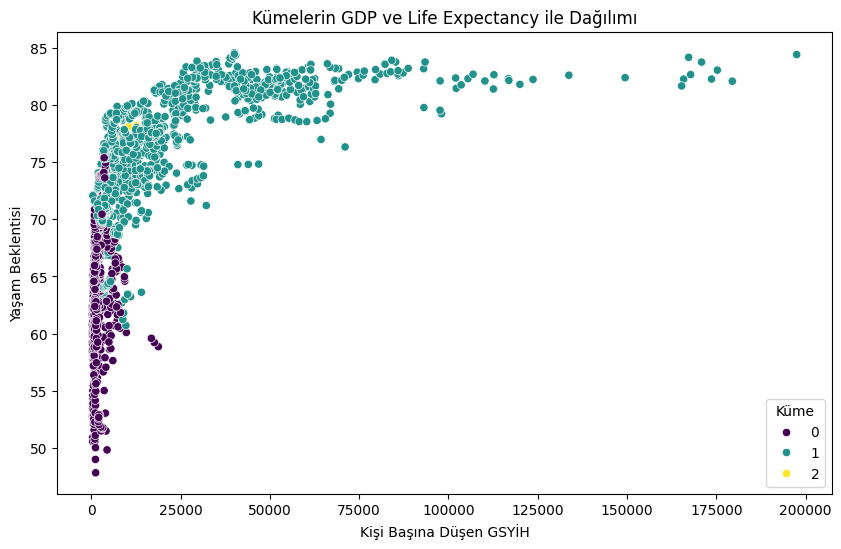

In [ ]:
# Secilen İki Özelliği görselliştirelim
plt.figure(figsize=(10,6))
sns.scatterplot(
    x = data['GDP_Per_Capita'],
    y = data['Life_Expectancy'],
    hue = data['Cluster'],
    palette = 'viridis'

)
plt.title('Kümelerin GDP ve Life Expectancy ile Dağılımı')
plt.xlabel('Kişi Başına Düşen GSYİH')
plt.ylabel('Yaşam Beklentisi')
plt.legend(title='Küme')
plt.show()
